# IMDB Data Visualization

## Projeto da disciplina **SSC0252 - Visualização Computacional**

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

* Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

---

# 1. Introdução

O conjunto de dados ***IMDB Movies*** é uma valiosa fonte de informações para pesquisadores do mundo cinematográfico. Composta por uma seleção dos 1000 filmes mais bem avaliados na plataforma IMDB, essa base oferece uma visão abrangente das tendências culturais. Cada filme na base possui atributos interessantes, como o título do filme, os gêneros a que pertencem, o *rating* no IMDB e seu ano de lançamento, proporcionando assim um conjunto de dados robusto que pode ser utilizado para análises de tendências audiovisuais, pesquisas culturais e até mesmo em sistemas de recomendações. A riqueza de informações contidas nessa base de dados a torna uma ferramenta indispensável para explorar e compreender a evolução do cinema ao longo das décadas.

---

# 2. Compreensão dos Dados

O projeto está armazenado no respositório disponível em [Github](https://github.com/ciziks/IMDB-data-visualization).

## 2.1. Coleta dos Dados

O conjunto de dados utilizado para a análise do projeto foi extraído da plataforma Kaggle, disponível em [IMDB Movies Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows). Os dados se referem às 1000 produções audiovisuais com maior nota no site [IMDB](https://www.imdb.com).

## 2.2. Dicionário de Dados

* **Series_Title**: Nome do Filme;

* **Released_Year** - Ano de lançamento do Filme;

* **Certificate** - Certificado do Filme;

* **Runtime** - Duração total do Filme;

* **Genre** - Gêneros do Filme;

* **IMDB_Rating** - Nota do Filme no site do IMDB (0 - 10);

* **Overview** - Sinopse do Filme;

* **Meta_score** - Nota do Filme no site do MetaCritic (0 - 100);

* **Director** - Nome do Diretor;

* **Star1, Star2, Star3, Star4** - Nome dos atores que estrelaram o Filme;

* **No_of_votes** - Número de votos do Filme;

* **Gross** - Arrecadação do Filme;

* **Poster_Link** - Link do poster do Filme no IMDB.

## 2.3. Tipo das Variáveis

* **Variáveis Qualitativas**
    * Ordinais
        * Released_Year;
        * Certificate.

    * Nominais:
        * Series_Title;
        * Genre;
        * Overview;
        * Director;
        * Star1, Star2, Star3, Star4.



* **Variáveis Quantitativas**:
    * Discretas:
        * Runtime;
        * Meta_score;
        * No_of_Votes.

    * Contínuas:
        * IMDB_Rating;
        * Gross.

## 2.4. Questionamentos Iniciais

* Quais as características (duração, gênero, classificação indicativa, etc...) dos filmes no Top 1000?

* Como os filmes do Top 1000 estãos distríbuidos no decorrer dos anos?

* Quais diretores estão associados aos maiores *ratings*?

* Quais atores estrelaram os filmes com maior *rating*?

* Que diretores mais arrecadaram com seus filmes?

* Existe uma correlação da duração do filme com sua arrecadação?

* Como o *rating* do filme está correlacionado com sua arrecadação (*gross*)?

* Quais as palavras mais comuns nas sinopses dos filmes?

* Qual nota explica melhor a arrecadação do filme: IMDB ou MetaCritic?

* Qual combinação de atores apresentam os melhores resultados de bilheteria?

---

# 3. Tratamento dos Dados

In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Coletando Base de Dados
df = pd.read_csv("./imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Visualizando colunas
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
# Verificando Tipos das Colunas
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [5]:
# Removendo coluna do Poster (Desinteressante à Análise)
df.drop(columns=['Poster_Link'], inplace = True)

In [6]:
# Transformando Gross em um valor numérico
def gross_to_numeric(gross):
    if isinstance(gross, str):
        return float("".join(re.findall(r"\d", gross)))
    return gross

df["Gross"] = df["Gross"].apply(gross_to_numeric)

In [7]:
# 286 Filmes com valores nulos
len(df[df.isna().any(axis=1)])

286

In [8]:
# As Colunas onde há valores NaN são: Certificate, Meta_score, Gross
df[df.columns[df.isna().any()]]

,Certificate,Meta_score,Gross
0,A,80.0,28341469.0
1,A,100.0,134966411.0
2,UA,84.0,534858444.0
3,A,90.0,57300000.0
4,U,96.0,4360000.0
...,...,...,...
995,A,76.0,NaN
996,G,84.0,NaN
997,Passed,85.0,30500000.0
998,NaN,78.0,NaN


In [9]:
# Inputação dos valores médios?
df[['IMDB_Rating','Meta_score','Gross']].describe()

,IMDB_Rating,Meta_score,Gross
count,1000.000000,843.000000,8.310000e+02
mean,7.949300,77.971530,6.803475e+07
std,0.275491,12.376099,1.097500e+08
min,7.600000,28.000000,1.305000e+03
25%,7.700000,70.000000,3.253559e+06
50%,7.900000,79.000000,2.353089e+07
75%,8.100000,87.000000,8.075089e+07
max,9.300000,100.000000,9.366622e+08


In [10]:
# Dropando valores NaN
df.dropna(inplace=True)

---

# 4. Análise Exploratória dos Dados

## 4.1. Análise Univariada

In [12]:
# Classificação Indicativa dos Filmes no Top 1000
fig = px.pie(values=df["Certificate"].value_counts(), 
             names=df["Certificate"].unique(), 
             title='Classificação Indicativa dos Filmes no Top 1000 do IMDB').update_traces(pull=0.02)
fig.show()

In [28]:
# Top 1000 Filmes IMDB distribuídos ao longo dos Anos (Ordenar por Ano)
fig = px.bar(
    x=df["Released_Year"].unique(),
    y=[df["Released_Year"].value_counts()],
    title="Top 1000 Filmes IMDB distribuídos ao longo dos Anos",
    labels={"value": "Quantidade de filmes", "x": "Ano de Lançamento"},
).update_layout(showlegend=False, xaxis={'categoryorder': 'total ascending'}).update_xaxes(type='category')
fig.show()

In [48]:
# Distribuição do IMDB Rating
fig = px.histogram(
    x=df.IMDB_Rating, 
    title="Distribuição do IMDB Rating nos Filmes",
    marginal="box",
    labels={"x": "Nota no IMDB"}
    ).update_traces(marker_color="Tomato")
fig.show()

In [38]:
# Distribuição do MetaCritic
fig = px.histogram(
    x=df.Meta_score, 
    title="Distribuição do MetaScore nos Filmes",
    marginal="box",
    labels={"x": "Nota no MetaCritic"}
    ).update_traces(marker_color="DarkSlateGray")
fig.show()

In [52]:
# Distribuição da Arrecadação dos Filmes
fig = px.histogram(
    x=df.Gross, 
    title="Distribuição da Arrecadação dos Filmes",
    marginal="box",
    labels={"x": "Arrecadação do Filme em Dólares"}
    ).update_traces(marker_color="DarkOliveGreen")
fig.show()

In [34]:
df_aux = df.copy()

df_aux['Genre'] = df_aux['Genre'].str.split(', ')
df_aux = df_aux.explode('Genre')

# Classificação Indicativa dos Filmes no Top 1000
fig = px.pie(values=df_aux["Genre"].value_counts(), 
             names=df_aux["Genre"].unique(), 
             title='Gênero dos Filmes no Top 1000 do IMDB').update_traces(pull=0.02)
fig.show()

## 4.2. Análise Multivariada

Text(0.5, 1.0, 'Correlações entre atributo')

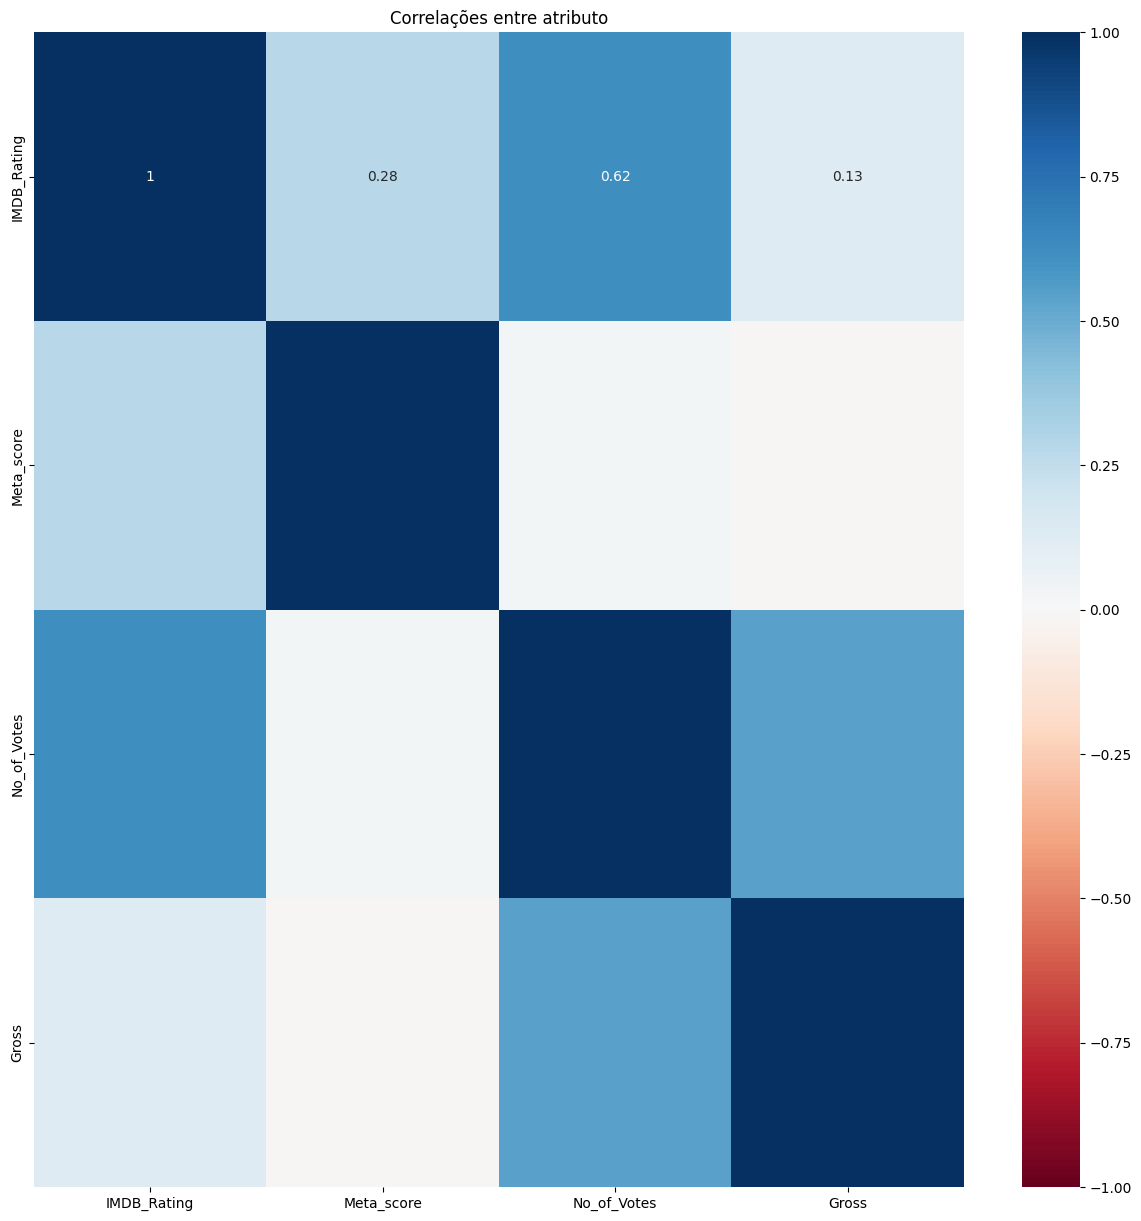

In [30]:
# Mapa de calor das correlações
correlations = df.select_dtypes(include='number').corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlations, annot=True, cmap='RdBu', vmin=-1.0, vmax=1.0)
plt.title('Correlações entre atributo')

In [32]:
df[["Gross", "Meta_score"]].corr()

,Gross,Meta_score
Gross,1.000000,-0.014801
Meta_score,-0.014801,1.000000
